## Importing Library

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Loading Data

In [4]:
data = pd.read_csv('multiple_linear_regression.csv')

**A little bit of data exploration**

In [42]:
data.head()
data.drop('Feature 3' , axis=1,inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Target     200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


## Data Preprocessing

#### Handling NULL Value

In [44]:
data = data.dropna()

In [45]:
data.shape

(200, 3)

#### Splitting data

In [46]:
output_col = "Target" 

In [47]:
x = data.iloc[:, data.columns != output_col]
#x = data.iloc[:, [0, 1]]
x

,Feature 1,Feature 2
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [48]:
y = data.loc[:, output_col]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Target, Length: 200, dtype: float64

In [49]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Target, Length: 200, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.30, random_state = 43)

In [51]:
x_train

,Feature 1,Feature 2
71,109.8,14.3
90,134.3,4.9
100,222.4,4.3
44,25.1,25.7
94,107.4,14.0
...,...,...
58,210.8,49.6
21,237.4,5.1
49,66.9,11.7
64,131.1,42.8


# <font color = "green">Linear Regression</font>

### Training model

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [53]:
lr.coef_

array([0.04595565, 0.18011132])

In [54]:
lr.intercept_

3.042657860971822

### Predicting Test_input

In [55]:
predicted_value = lr.predict(x_test)

In [56]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, predicted_value)

In [57]:
cost

2.23495940986144

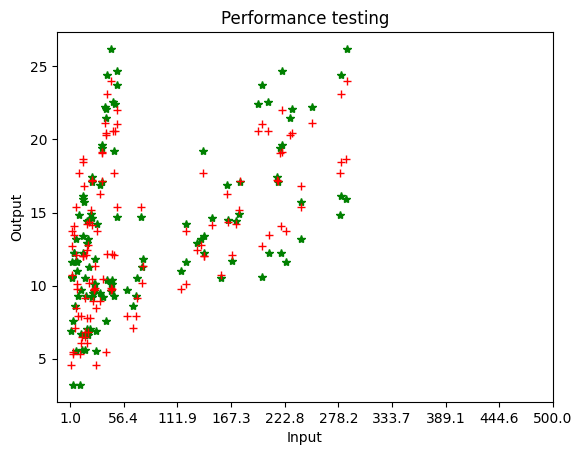

In [58]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, predicted_value, "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("Output")
plt.show()

## ``Linear Regression Model Assumptions``

### $Homoscedasticity$ 

In [59]:
print(predicted_value)

[ 8.43926214 15.37304406 12.05589409  9.76037047 11.36264175 18.68952123
 24.00428962  7.124972   21.99214225 16.83157046  7.888633   23.10698611
 19.177439    5.46457559 15.39142217  9.83231859 12.06037977  9.74374744
 21.14699368  9.16890787 20.42526086 12.10020454 13.76899074 10.70760216
 16.23873324  7.81503969 20.58658665 20.31074286  8.92099927 14.11658568
 17.23200766 15.14199692 17.19252602 19.08093213 17.19213209 12.1660591
 12.75995477  6.08137547 10.11622664 13.48286524 12.01527626  9.68363397
  5.32036732 10.1593781  14.23002243 14.05656862 14.36668892 10.4583096
 21.08073585 13.71348631  6.5130424   7.94295045 17.73710722 17.73855545
 12.40906528 12.69288626 20.61370184 18.44595628  4.59461636  6.81597857]


In [60]:
print(y_test.values)

[ 5.5 14.7 13.4 11.  11.8 15.9 26.2  8.6 24.7 15.7  9.3 24.4 19.6  7.6
 13.2 10.1 11.7 10.1 22.2 10.5 22.1  9.3 11.6 10.5 16.9  7.  22.6 21.5
  9.5 14.6 17.4 14.9 17.1 19.4 17.1 10.4 13.2  6.7 11.6 12.2 12.2  9.6
  3.2 11.3 14.4 12.2 14.5  9.2 23.7 14.2  5.6  9.7 19.2 14.8 12.9 10.6
 22.4 16.1  6.9  6.6]


In [61]:
residual = y_test - predicted_value

In [62]:
residual

56    -2.939262
37    -0.673044
67     1.344106
79     1.239630
80     0.437358
188   -2.789521
183    2.195710
10     1.475028
128    2.707858
62    -1.131570
65     1.411367
17     1.293014
133    0.422561
195    2.135424
146   -2.191422
38     0.267681
173   -0.360380
149    0.356253
93     1.053006
29     1.331092
0      1.674739
2     -2.800205
122   -2.168991
180   -0.207602
95     0.661267
121   -0.815040
185    2.013413
39     1.189257
66     0.579001
19     0.483414
11     0.167992
45    -0.241997
41    -0.092526
92     0.319068
168   -0.092132
1     -1.766059
57     0.440045
189    0.618625
151    1.483773
167   -1.282865
116    0.184724
138   -0.083634
155   -2.120367
82     1.140622
160    0.169978
181   -1.856569
171    0.133311
12    -1.258310
55     2.619264
77     0.486514
22    -0.913042
129    1.757050
105    1.462893
102   -2.938555
159    0.490935
9     -2.092886
15     1.786298
150   -2.345956
76     2.305384
119   -0.215979
Name: Target, dtype: float64

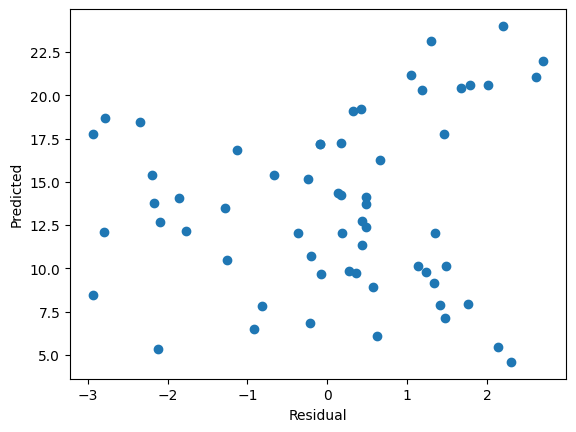

In [63]:
plt.scatter(residual, predicted_value)
plt.xlabel("Residual")
plt.ylabel("Predicted")
plt.show()
# hence we can see that there is no relationship between residual and predicted

### $Normality$ $in$ $Residuals$ 

C:\Users\Satyam\AppData\Local\Temp\ipykernel_19468\1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='Target', ylabel='Density'>

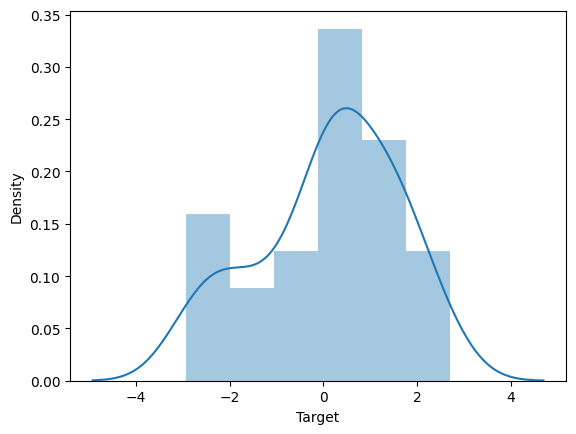

In [64]:
sns.distplot(residual)

In [ ]:
## WE CAN SEE THAT MOST OF THE TARGET VALUES IS CLOSE TO 0.
## AND ALSO THEY MAKE A BELL SHAPED CURVE FOLLOWING NORMAL DISTRIBUTION

## ``Linear Regression Model with OLS Summary``

In [65]:
x_with_constant = sm.add_constant(x_train)

In [66]:
x_with_constant

,const,Feature 1,Feature 2
71,1.0,109.8,14.3
90,1.0,134.3,4.9
100,1.0,222.4,4.3
44,1.0,25.1,25.7
94,1.0,107.4,14.0
...,...,...,...
58,1.0,210.8,49.6
21,1.0,237.4,5.1
49,1.0,66.9,11.7
64,1.0,131.1,42.8


In [67]:
model = sm.OLS(y_train, x_with_constant)

In [68]:
result = model.fit()

In [39]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [70]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     523.8
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           6.70e-65
Time:                        17:00:18   Log-Likelihood:                -276.51
No. Observations:                 140   AIC:                             559.0
Df Residuals:                     137   BIC:                             567.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0427      0.376      8.085      0.0